# Practic examples of SysGadgets - Plot

### Importing the main module...

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from systool import plot
import pandas as pd
import geopandas as gpd

### <span style="color:blue">**hist**</span>

This function is responsible to plot histogram graphics based on user defined parameters.

First, lets import a DataFrame to be used...

In [2]:
df = pd.read_csv(r'examples_databases\hist\si-log-2020.csv', encoding='latin1', sep=';')
df.head()

,Nº_boletim,data_boletim,Nº_municipio,nome_municipio,seq_logradouros,Nº_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradouro_anterior,Nº_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,Nº_imovel,Nº_imovel_proximo
0,2020-060939318-001,19/12/2020 15:10,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,0,0
1,2020-005366112-001,31/01/2020 15:27,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,341,0
2,2020-040388513-001,21/08/2020 13:14,1,BELO HORIZONTE,2,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,645,CIDADE NOVA ...,B,BAIRRO,0,0
3,2020-029371860-001,19/06/2020 12:04,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,645,CIDADE NOVA ...,B,BAIRRO,0,0
4,2020-054108200-001,09/11/2020 14:08,1,BELO HORIZONTE,1,117712,RUA,JOAO ARANTES ...,RUA,CINQUENTA E UM ...,808,UNIAO ...,B,BAIRRO,25,0


In [3]:
# Now, lets make a pivot table to quantify the number of acidents by the city street type.

df = pd.pivot_table(df, values='Nº_boletim', index='tipo_logradouro', aggfunc='count')
df.head(20)

,Nº_boletim
tipo_logradouro,
ACS,1
ALA,37
AVE,5183
BEC,29
EST,8
PCA,76
ROD,951
RUA,7812
TRE,32


With this data, now we can create an histogram with the number of acidents!

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


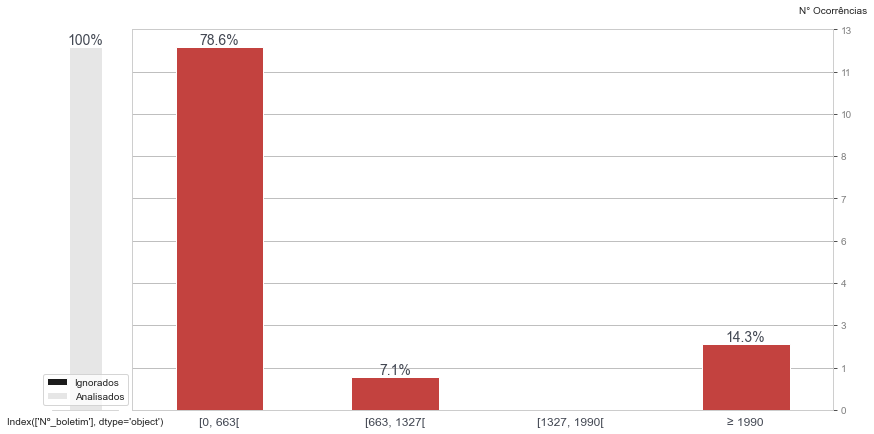

In [4]:
hist = plot.hist(df['Nº_boletim'])

About the histogram structure, the graphic in the center with the red bars is the histogram, the interval description is localized on the x-axis and the number of ocurrencies in the y-axis. The graphic on the left is the total of the analized or desconsidered values.

The function also have other parameters, if you want to add a title, subtitle and legend, you can make it too!

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


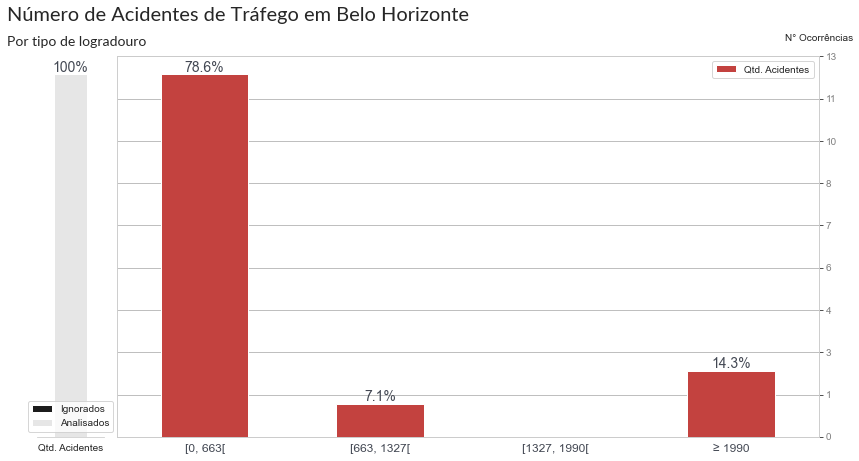

In [5]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes')

Great, now we have a more suitable graphic, but have a few things that we can change to make it more suitable to our data... Lets add a title to the x-axis, a commentary, the source of info and the number of bins we want!

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


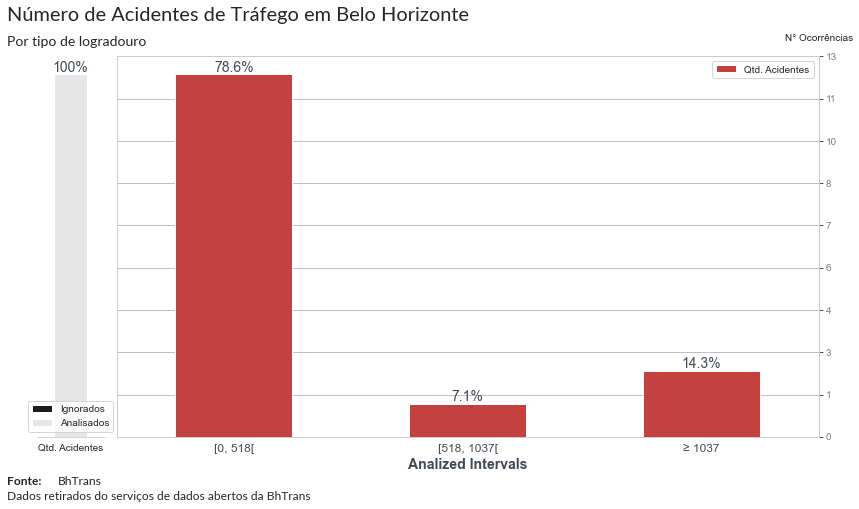

In [6]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4)

Now, we are almost there, for the final touches, our histogram analizes all the data, so a column for the quota of data is useless, lets remove it and add superior and inferior limits!

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


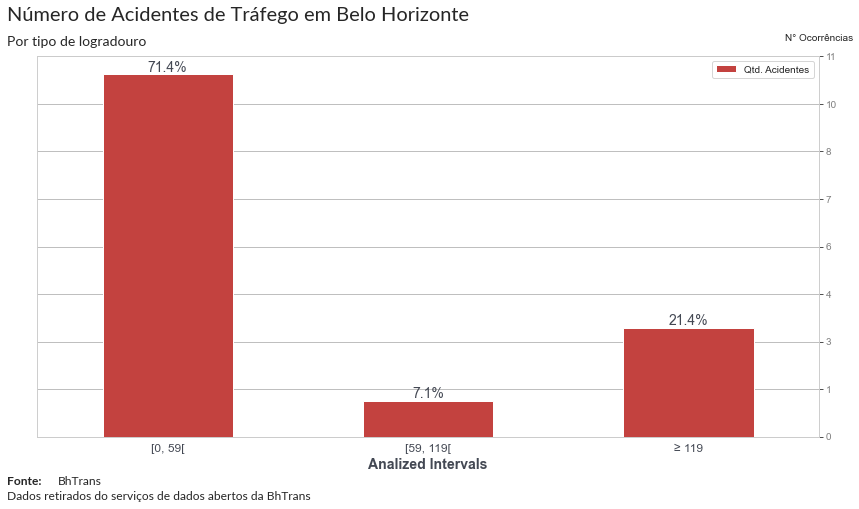

In [7]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False)

Now that the graphic is showing specifically the info we want, but the display is show % as bar labels and values as y-axis, what if we want to change it, or just show one type of value? The parameter **legend_control** is the responsible to make this ajustments...

Using the **'%V'** parameter...

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


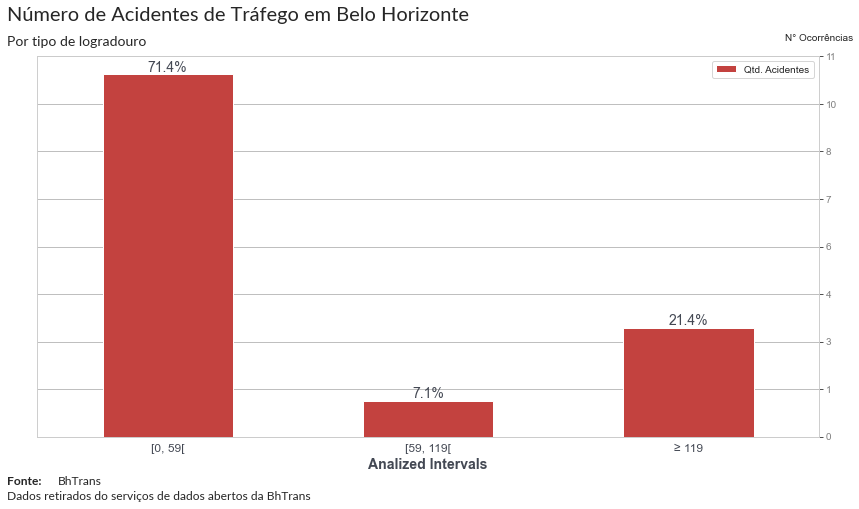

In [8]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='%V')

Using the **'V%'** parameter...

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)
C:\Users\pcardoso\PycharmProjects\systools\systool\plot.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_aux.set_yticklabels(['{:.2f}%'.format(tick * 100) for tick in list(ax_aux.get_yticks())], color='grey')


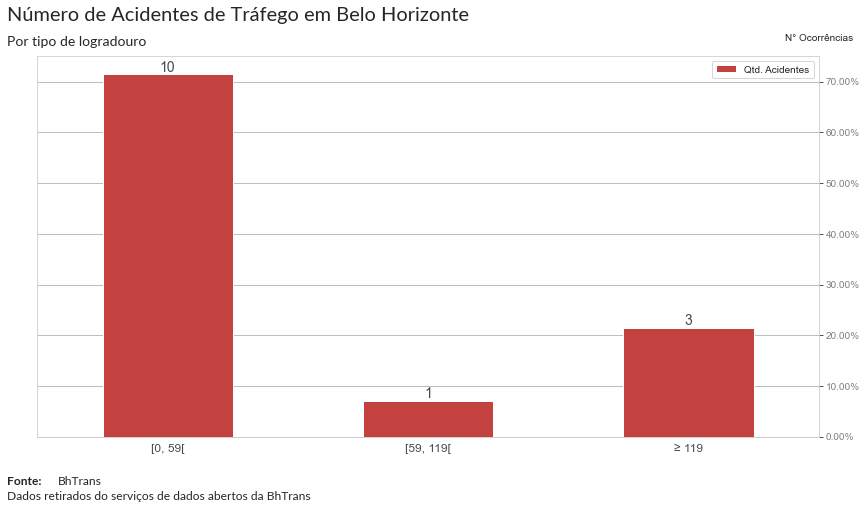

In [9]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='V%')

Using the **'%'** parameter...

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


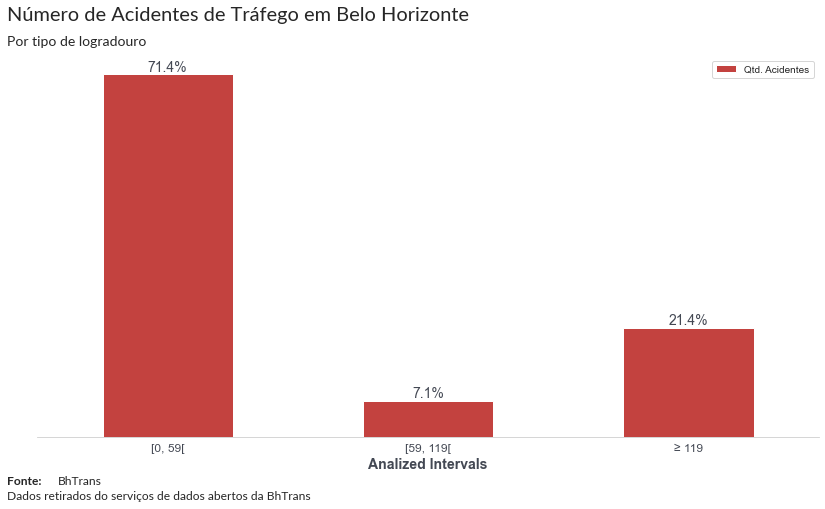

In [10]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='%')

Using the **'V'** parameter...

C:\Users\pcardoso\PycharmProjects\systools\systool\helpers\charts.py:120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  what_df.loc[:, c] = w.append(n)


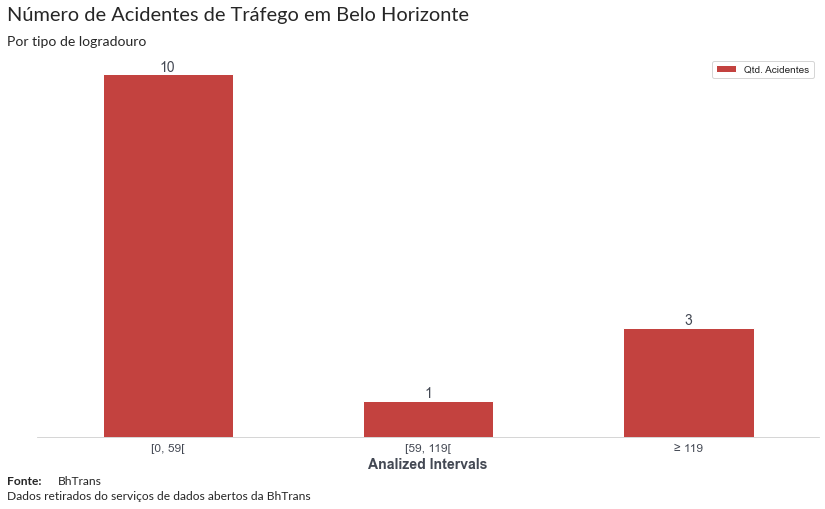

In [11]:
hist = plot.hist(df['Nº_boletim'], title='Número de Acidentes de Tráfego em Belo Horizonte', subtitle='Por Tipo de Logradouro', legenda='Qtd. Acidentes', 
                 xlabel='Analized Intervals', source='BhTrans', comentario='Dados retirados do serviços de dados abertos da BhTrans', 
                 bins=4, lwl=0, upl=200, report_nan=False, legend_control='V')

### <span style="color:blue">**maps**</span>